# Posterior predictive tests


|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |

**Model 1:**

* For each group (treatment and control), all 6 studies have the same fixed, but unknown, probability of success, $\theta_t,\theta_c\in[0,1]$.
* The data follow a binomial distribution in each study, conditioned on the probability of success — $\theta_t$ for treatment or $\theta_c$ for control.
* The priors over $\theta_t$ and $\theta_c$ are uniform.

These assumptions lead to the following model.

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

* Prior: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

* Posterior for treatment group: $\text{Beta}(\theta_t\,|\,108, 35)$.

* Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

For the non-hierarchical model and the control group half of the data set, choose a test statistic to show that the non-hierarchical model does not explain the control group data well. You should generate posterior data samples from this model and compare the test statistic of the real data to the distribution under your samples from the posterior. Note that the posterior distribution for this model is already provided in the notebook, so you don’t have to calculate it.

Submit your test statistic function, your code for generating samples from the posterior and computing the test statistic, and a histogram analogous to Gelman Figure 6.4 (reproduced below). Also, calculate and provide your p-value. Since the test statistic is supposed to show a deficiency of the model the p-value should be less than 0.05 or greater than 0.95.

In [1]:
# Importing libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Given information
N_SAMPLE = 1000
control_data = np.array([
    [9, 15],
    [11, 18],
    [4, 10],
    [21, 39],
    [12, 29],
    [0, 10]
])
posterior = stats.beta(58, 65)
num_of_patients = control_data[:,1]

In [3]:
# Generate posterior samples
def generate_samples(posterior, 
                          num_of_patients, 
                          size=1):
    """Sample from posterior and then for each trial sample from a
    binomial distribution with the number of patients corresponding
    to those seen in the data."""

    s_samples = np.empty((size, len(num_of_patients)))
    theta_samples = posterior.rvs(size=size)
    for i in range(size):
        theta = posterior.rvs()
        s = [stats.binom.rvs(n, theta) for n in num_of_patients]
        s_samples[i, :] = s
    return s_samples
    
samples = generate_samples(
    posterior, 
    num_of_patients, 
    N_SAMPLE)

My test statistic $\sigma$ is defined as

$$\sigma = \sqrt{\frac{\sum_{i=1}^6 (r_i - \bar{r})^2}{6}}$$

where the ratio of recoveries $r_i$ is defined as $r_i=\frac{s_i}{n_i}$

In [4]:
# Define function for test statistic
def calc_test_statistic(num_of_recoveries, num_of_patients):
    """Standard deviation of ratio of recoveries across different
    clinical trials."""
    ratio_of_recoveries = num_of_recoveries / num_of_patients.astype(float)
    return ratio_of_recoveries.std()

In [5]:
# Calculate test statistic for data and posterior samples
data_stat = calc_test_statistic(control_data[:,0], num_of_patients)
sample_stat = [calc_test_statistic(each_sample, num_of_patients) 
               for each_sample in samples]

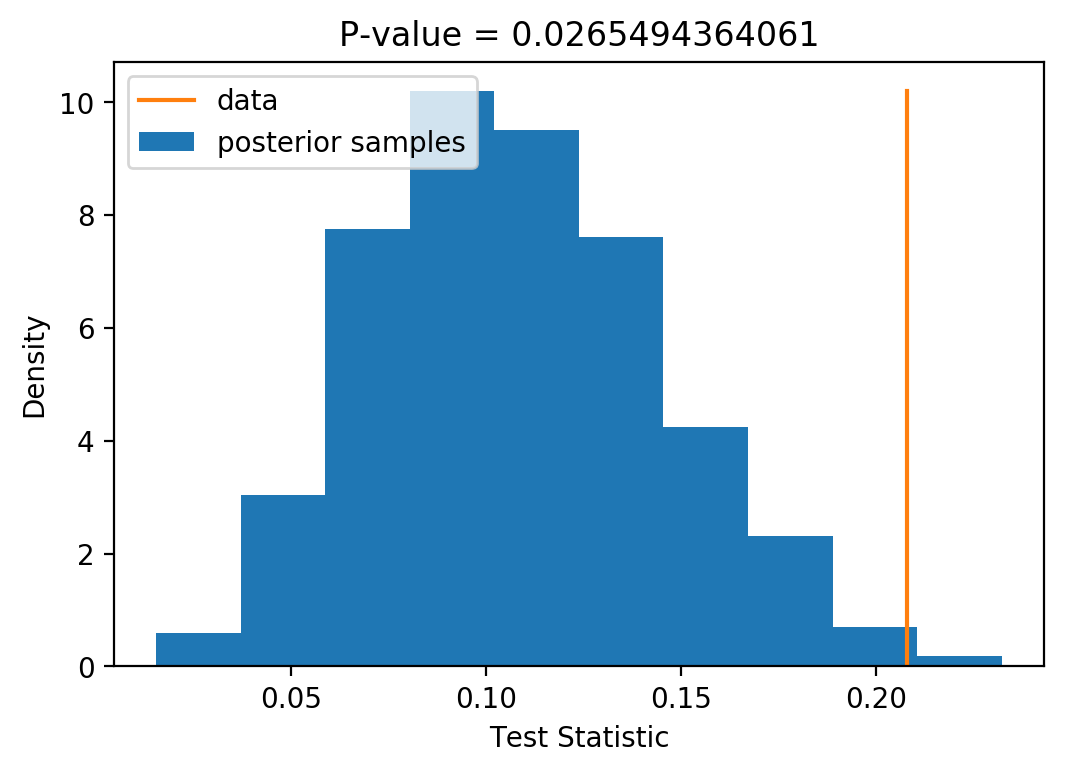

In [6]:
# Plot histogram and calculate p-value
plt.figure(dpi=200)
heights, _, __ = plt.hist(sample_stat, 
                          density=True, 
                          label="posterior samples")
plt.plot([data_stat, data_stat], [0, max(heights)], label="data")
plt.ylabel("Density")
plt.xlabel("Test Statistic")
plt.legend()
plt.title("P-value = {}".format(np.percentile(sample_stat,data_stat)))
plt.show()